<a href="https://colab.research.google.com/github/asu-trans-ai-lab/osm_test_data_set/blob/main/Integration_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: load the OSM file from the repository of OSM testing datasets**

In [1]:
!rm -rf ./osm_test_data_set/
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

%cd osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 200 (delta 67), reused 131 (delta 24), pack-reused 0
Receiving objects: 100% (200/200), 89.71 MiB | 23.26 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/osm_test_data_set


Check the file icon on the left hand side, makesure file map.osm exists.

**Step 1: install python packages**

In [2]:
!pip install osm2gmns
!pip install grid2demand


     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 1.0MB 12.3MB/s 
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


**Step 2: convert OSM to GMNS Files**

osm2gmns, version 0.4.4


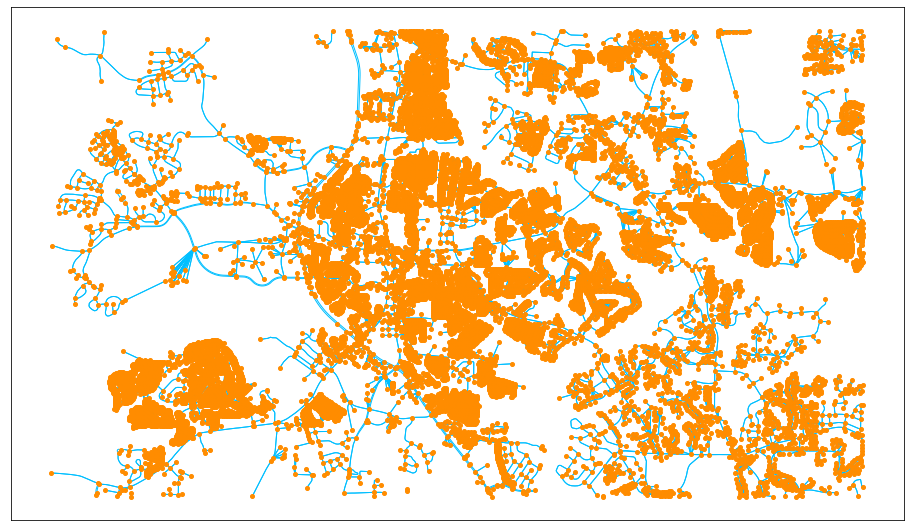

Figure is saved to network.jpg


In [3]:
import osm2gmns as og
net = og.getNetFromPBFFile('map.pbf', POIs=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

Check node.csv, link.csv and poi.csv exist in the left-hand-side Colab folder.

output the bike-only links

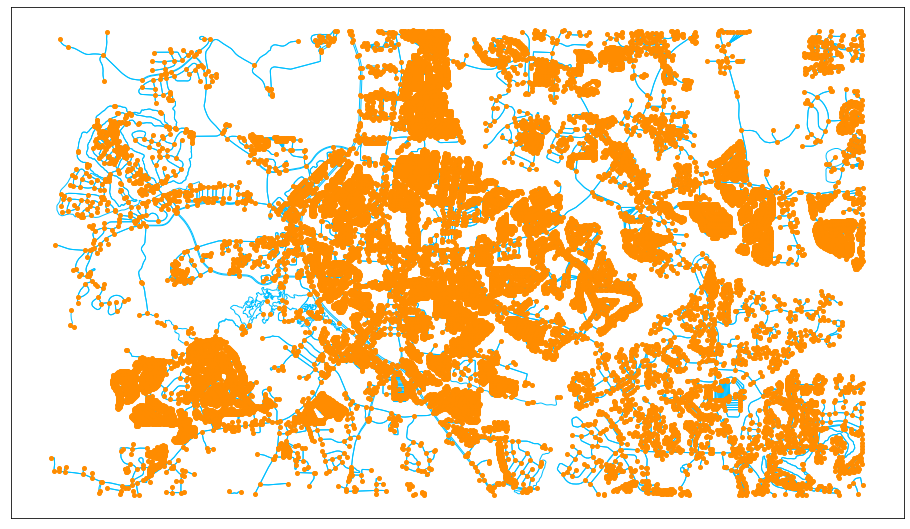

Figure is saved to network.jpg


In [4]:
import osm2gmns as og
net = og.getNetFromPBFFile('map.pbf', network_type=('bike'), POIs=True, default_lanes=True,default_speed=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='bike')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

output the walk-only links

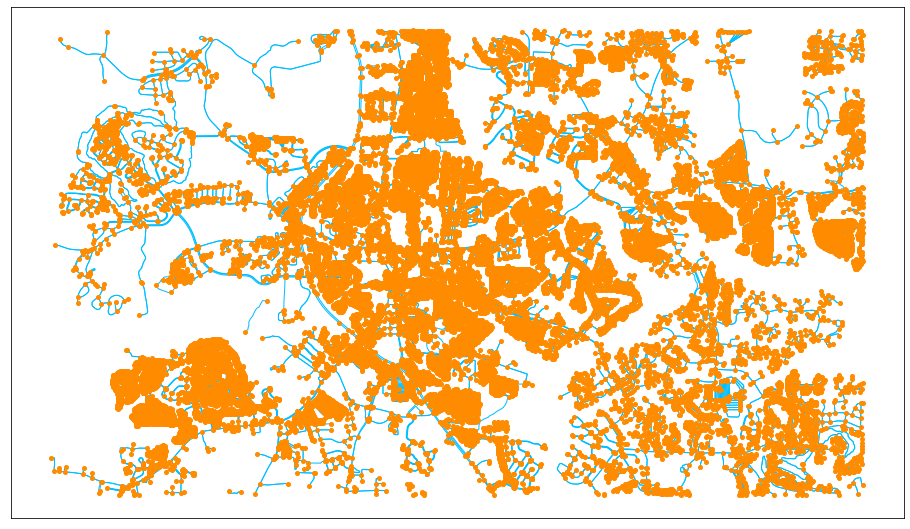

Figure is saved to network.jpg


In [5]:
import osm2gmns as og
net = og.getNetFromPBFFile('map.pbf', network_type=('walk'), POIs=True, default_lanes=True,default_speed=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net)
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

**Step 3: Run grid2demand to generate demand based POI rates**

In [6]:
import grid2demand as gd
"Step 1: Read Input Network Data"
net = gd.ReadNetworkFiles('')

"Step 2: Partition Grid into cells"
zone = gd.PartitionGrid()
# user can customize number of grid cells or cell's width and height

"Step 3: Get Production/Attraction Rates of Each Land Use Type with a Specific Trip Purpose"
triprate = gd.GetPoiTripRate(trip_rate_folder='',trip_purpose=1)
# user can customize poi_trip_rate.csv and trip purpose

"Step 4: Define Production/Attraction Value of Each Node According to POI Type"
nodedemand = gd.GetNodeDemand()

"Step 5: Calculate Zone-to-zone Accessibility Matrix by Centroid-to-centroid Straight Distance"
accessibility = gd.ProduceAccessMatrix(latitude=30, accessibility_folder='')
# user can customize the latitude of the research area and accessibility.csv

"Step 6: Apply Gravity Model to Conduct Trip Distribution"
demand = gd.RunGravityModel(trip_purpose=1, a=None, b=None, c=None)
# user can customize friction factor coefficients under a specific trip purpose
"Step 7: Generate Agent"
demand = gd.GenerateAgentBasedDemand()

grid2demand, version 0.2.2


2021-05-07 18:27:50,144 - grid2demand_0418a.py[line:411] - WARNING: Default cell width and height are the length on a flat surface under a specific latitude corresponding to the degree of 0.006!



Latitude used for grid partition =  30

Number of zones including virtual zones = 308


2021-05-07 18:27:54,586 - grid2demand_0418a.py[line:941] - WARNING: poi_trip_rate.csv does not exist in the current folder. Default values will be used.
2021-05-07 18:27:54,614 - grid2demand_0418a.py[line:1084] - WARNING: Production value of residential nodes is not defined! Default value is 10.
2021-05-07 18:27:54,615 - grid2demand_0418a.py[line:1087] - WARNING: Attraction value of residential nodes is not defined! Default value is 10.
2021-05-07 18:27:54,620 - grid2demand_0418a.py[line:1090] - WARNING: Production value of boundary nodes is not defined! Default value is 1000.
2021-05-07 18:27:54,622 - grid2demand_0418a.py[line:1093] - WARNING: Attraction value of boundary nodes is not defined! Default value is 1000.



Tab of trip purposes used in grid2demand =  1

Total number of poi nodes with unmatched production rate =  708
Total number of poi nodes with unmatched attraction rate =  189

Latitude used for calculating accessibility =  30

Number of OD pairs =  94864

Largest accessibility of distance = 14.54 km
Average accessibility of distance = 5.62 km

Default values of friction factor coefficients under trip purpose 1: 
a= 28507 
b= -0.02 
c= -0.123

Top 10 O-D Volume:
Top 1 O/D pair: zone 249->zone 250, volume = 8854
Top 2 O/D pair: zone 299->zone 300, volume = 8567
Top 3 O/D pair: zone 300->zone 299, volume = 8464
Top 4 O/D pair: zone 250->zone 249, volume = 8312
Top 5 O/D pair: zone 299->zone 298, volume = 7940
Top 6 O/D pair: zone 298->zone 299, volume = 7886
Top 7 O/D pair: zone 298->zone 300, volume = 6385
Top 8 O/D pair: zone 300->zone 298, volume = 6352
Top 9 O/D pair: zone 249->zone 299, volume = 6289
Top 10 O/D pair: zone 249->zone 248, volume = 6008

Zone-to-zone OD pair with large

shortest path calculation

In [7]:
"""install path4gmns"""
!pip install path4gmns --upgrade
"""import package"""
import path4gmns as pg 
import pandas as pd
from time import time

     |████████████████████████████████| 327kB 13.0MB/s 
path4gmns, version 0.6.0


In [8]:
import path4gmns as pg

load_demand = False
network = pg.read_network(load_demand)

print('\nshortest path (node id) from node 1 to node 2 is '
      +network.find_shortest_path(1, 2))
print('\nshortest path (link id) from node 1 to node 2 is '
      +network.find_shortest_path(1, 2, 'link'))



read node.csv


ValueError: ignored

**Step 4: Download data files**



In [ ]:
% cd ../
!zip -r /content/osm_test_data_set/map.zip /content/osm_test_data_set/


In [ ]:
from google.colab import files
files.download("/content/osm_test_data_set/map.zip")

**Step 5: Visualization using GMNS tool:**
By simply uploading node.csv and link.csv at https://asu-trans-ai-lab.github.io/index.html#,  
 you can easily create custom online maps for any GMNS network files. 
To view zone and demand information please visit this page to use QGIS/NeXTA tools. https://github.com/asu-trans-ai-lab/traffic-engineering-and-analysis/blob/master/undergraduate_student_project/QGIS%20For%20Gmns%20User%20Guide_v0.5.pdf 

**Option for downloading OSM map.osm file for the area of interest**

On OpenStreetMap homepage, click the Export button to enter Export mode. Before downloading, you may need to span and zoom in/out the map to make sure that your target area is properly shown on the screen. Or, you can use Manually select a different area to select your area more precisely. Click the Export button in blue to export the network you want.

Note that if the target area is too large, you may get an error message: “You requested too many nodes (limit is 50000). Either request a smaller area, or use planet.osm”. In this case, you can always click Overpass API to download the network you need via a mirror site.

You can uploda the file as shown below to Google Colab environment and repeat from step 2 of running OSM2GMNS to step 5



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

